## CSE 2794 – Machine Learning Workshop 2
### LAB ASSIGNMENT-3: OTIMIZATION AND REGULARIZATION IN NEURAL NETWORKS

#### Name: Sai Kiran Mohanty 
#### Reg. No.: 2341013236
#### Section: 2c3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,KBinsDiscretizer ,LabelEncoder
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score , classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv("winequality-red.csv", delimiter=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
n_col = len(data.columns)
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
z_score = {}
for column in data.select_dtypes(include=[np.number]).columns:
    z_score[column] = zscore(data[column])
for column in z_score:
    data[f'Z_{column}'] = z_score[column]

In [10]:
z_data = data.iloc[:,n_col:]
z_data.head(2)

,Z_fixed acidity,Z_volatile acidity,Z_citric acid,Z_residual sugar,Z_chlorides,Z_free sulfur dioxide,Z_total sulfur dioxide,Z_density,Z_pH,Z_sulphates,Z_alcohol,Z_quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823


<Axes: >

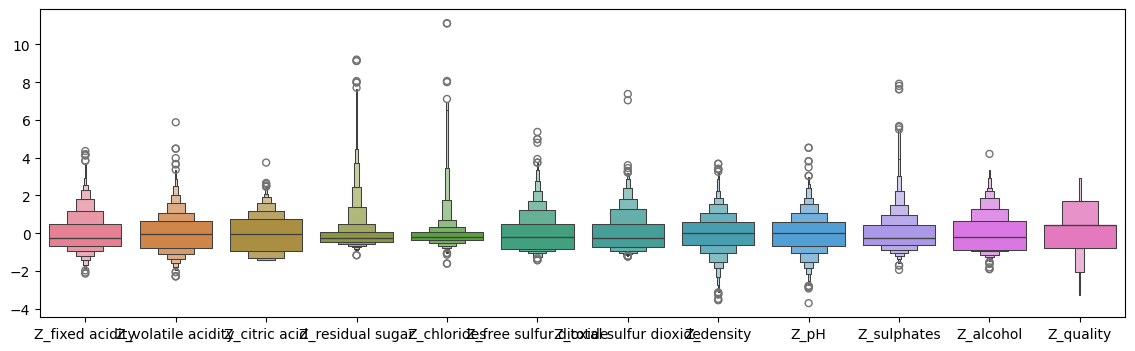

In [12]:
plt.figure(figsize=(14,4))
plt.tight_layout()
sns.boxenplot(z_data)

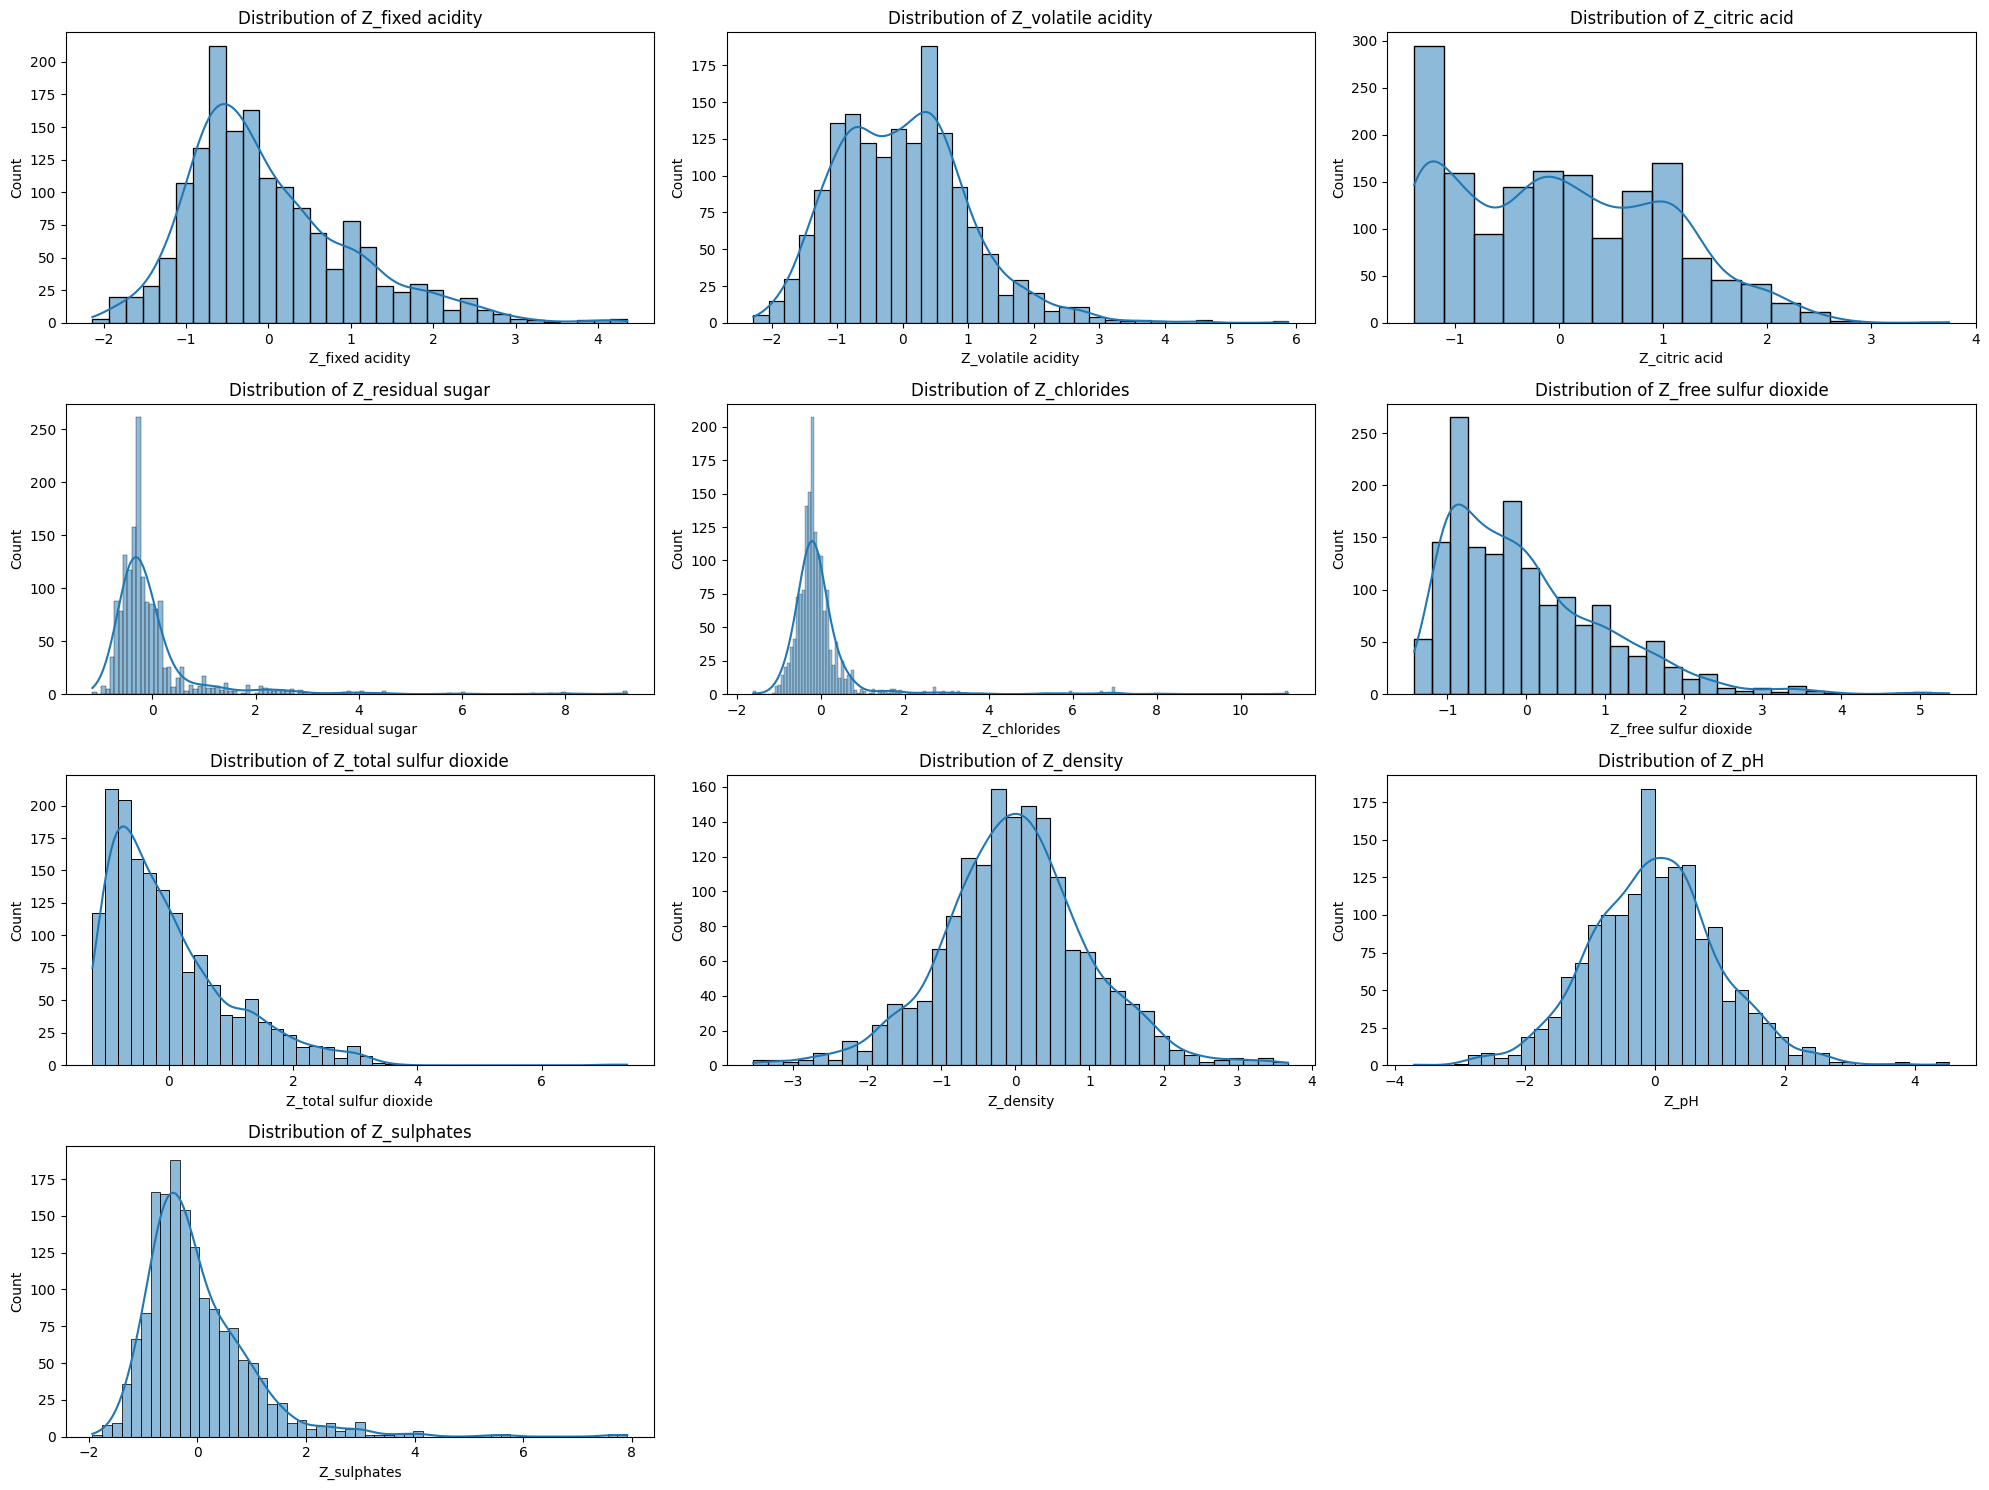

In [14]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(z_data.columns[:-2]):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=z_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [15]:
kbins = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
z_data['Z_alcohol'] = kbins.fit_transform(z_data[['Z_alcohol']])
bin_labels = {0:'low',1:'medium',2:'high'}
z_data['Z_alcohol'] = z_data['Z_alcohol'].map(bin_labels)
le = LabelEncoder()
z_data['Z_alcohol'] = le.fit_transform(z_data['Z_alcohol'])
scaler = MinMaxScaler()
z_data.iloc[:, [0,2]] = scaler.fit_transform(z_data.iloc[:, [0,2]])
std_scaler = StandardScaler()
z_data_scaled = std_scaler.fit_transform(z_data)
z_data_scaled = pd.DataFrame(z_data_scaled,columns=z_data.columns)

In [16]:
X = z_data_scaled.drop(['Z_quality'], axis=1)
y = z_data_scaled['Z_quality']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2) 

In [17]:
print(len(z_data_scaled['Z_quality'].unique()))
X_train.shape , X_test.shape , y_train.shape , y_test.shape

6


((1279, 11), (320, 11), (1279,), (320,))

In [18]:
y_train = to_categorical(y_train,num_classes=6)
y_test = to_categorical(y_test,num_classes=6)

model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11,kernel_regularizer=keras.regularizers.l2(0.01)))


model.add(Dense(11,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(11,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(Dense(6,activation='softmax'))

model.summary()

# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train,y_train,epochs=10,batch_size=22,validation_split=0.2,verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 490 (1.91 KB)

 Non-trainable params: 22 (88.00 B)

In [65]:
def compile_model(opt,batch_size=32):
    
    print(f"Optimizer used: {opt.__class__.__name__}")
    model.compile(optimizer = opt , loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train,y_train,epochs=5,batch_size=batch_size,validation_split=0.2,verbose=1)

    y_pred_proba = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_proba, axis=1)  
    y_true = np.argmax(y_test, axis=1)  
    accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"accuracy : {accuracy}")
    print(classification_report(y_true,y_pred_classes))
    print('-------------------------------------------------------------------------------------------------------------------------')
    
    plt.figure(figsize=(18,4))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs.')
    plt.ylabel('Loss')
    plt.title('Loss Vs. Val_Loss')
    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Acuuracy Vs. Val_Accuracy')
    plt.grid()
    plt.xlabel('Epochs.')
    plt.ylabel('Accuracy')
    plt.tight_layout()

Optimizer used: SGD
Epoch 1/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8235 - loss: 0.6027 - val_accuracy: 0.8203 - val_loss: 0.6579
Epoch 2/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8179 - loss: 0.6231 - val_accuracy: 0.8203 - val_loss: 0.6573
Epoch 3/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8226 - loss: 0.6090 - val_accuracy: 0.8203 - val_loss: 0.6590
Epoch 4/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8159 - loss: 0.6292 - val_accuracy: 0.8203 - val_loss: 0.6596
Epoch 5/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8315 - loss: 0.5969 - val_accuracy: 0.8203 - val_loss: 0.6629
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.84375
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       270
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
     

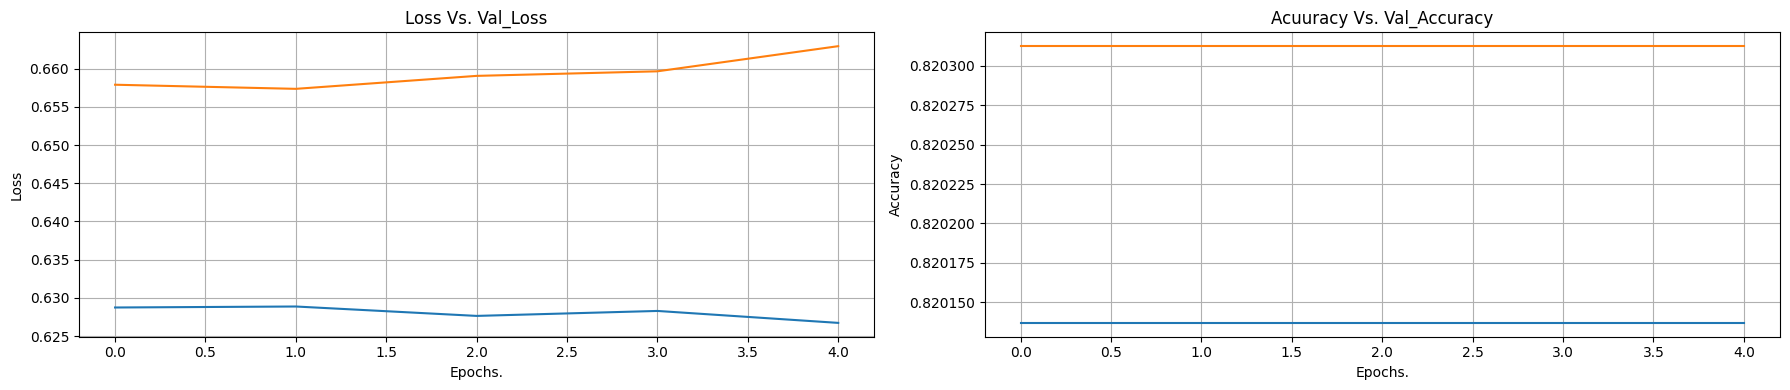

In [67]:
SGD = keras.optimizers.SGD()
compile_model(SGD,1)

SGD With Momentum
Optimizer used: SGD
Epoch 1/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8252 - loss: 0.6048 - val_accuracy: 0.8203 - val_loss: 0.6608
Epoch 2/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8049 - loss: 0.6426 - val_accuracy: 0.8203 - val_loss: 0.6626
Epoch 3/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8264 - loss: 0.6075 - val_accuracy: 0.8203 - val_loss: 0.6622
Epoch 4/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8159 - loss: 0.6325 - val_accuracy: 0.8203 - val_loss: 0.6606
Epoch 5/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8252 - loss: 0.5961 - val_accuracy: 0.8203 - val_loss: 0.6611
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.84375
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       270
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.

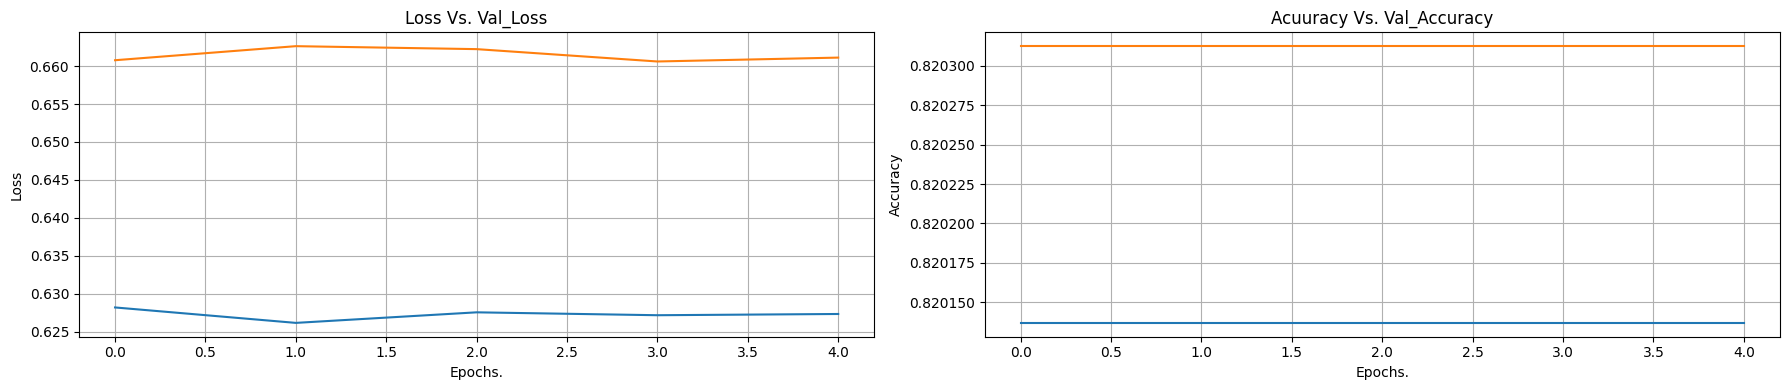

In [69]:
SGD_mommentum = keras.optimizers.SGD(momentum=0.9)
print('SGD With Momentum')
compile_model(SGD,1)

Optimizer used: Adagrad
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8231 - loss: 0.6052 - val_accuracy: 0.8203 - val_loss: 0.6611
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.6895 - val_accuracy: 0.8203 - val_loss: 0.6610
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.6648 - val_accuracy: 0.8203 - val_loss: 0.6610
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8371 - loss: 0.5714 - val_accuracy: 0.8203 - val_loss: 0.6609
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8330 - loss: 0.6093 - val_accuracy: 0.8203 - val_loss: 0.6609
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.84375
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       270
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0

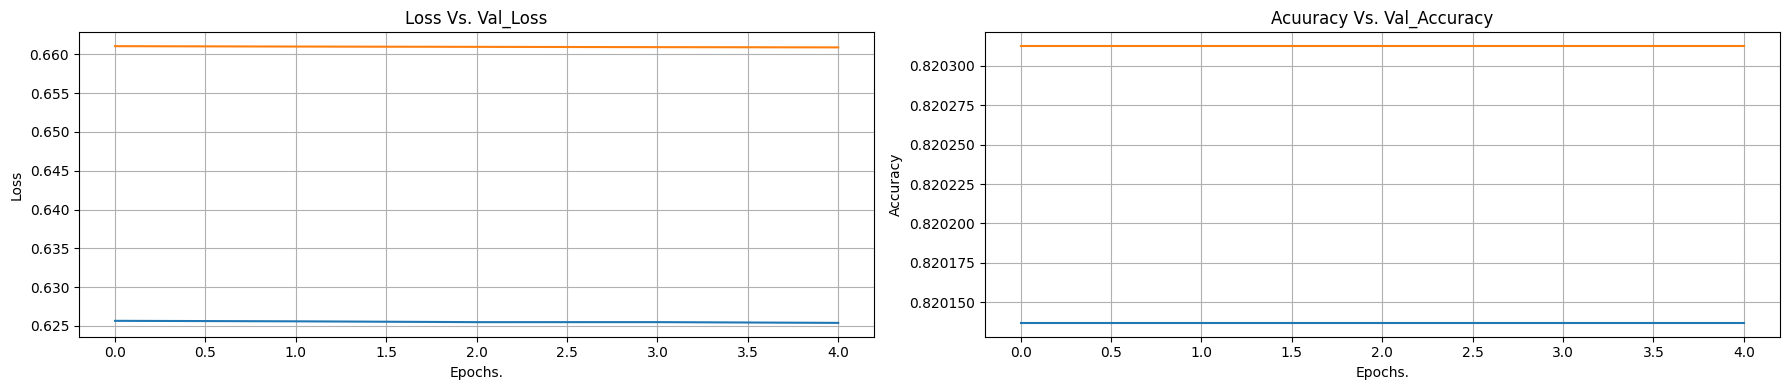

In [70]:
AdaGrad = keras.optimizers.Adagrad()
compile_model(AdaGrad)

Optimizer used: RMSprop
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8252 - loss: 0.5962 - val_accuracy: 0.8203 - val_loss: 0.6035
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8200 - loss: 0.5487 - val_accuracy: 0.8203 - val_loss: 0.6010
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.5620 - val_accuracy: 0.8203 - val_loss: 0.6000
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.5216 - val_accuracy: 0.8164 - val_loss: 0.5906
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8468 - loss: 0.4757 - val_accuracy: 0.8086 - val_loss: 0.5821
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.85
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       270
           1       0.50      0.12      0.20        40
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00

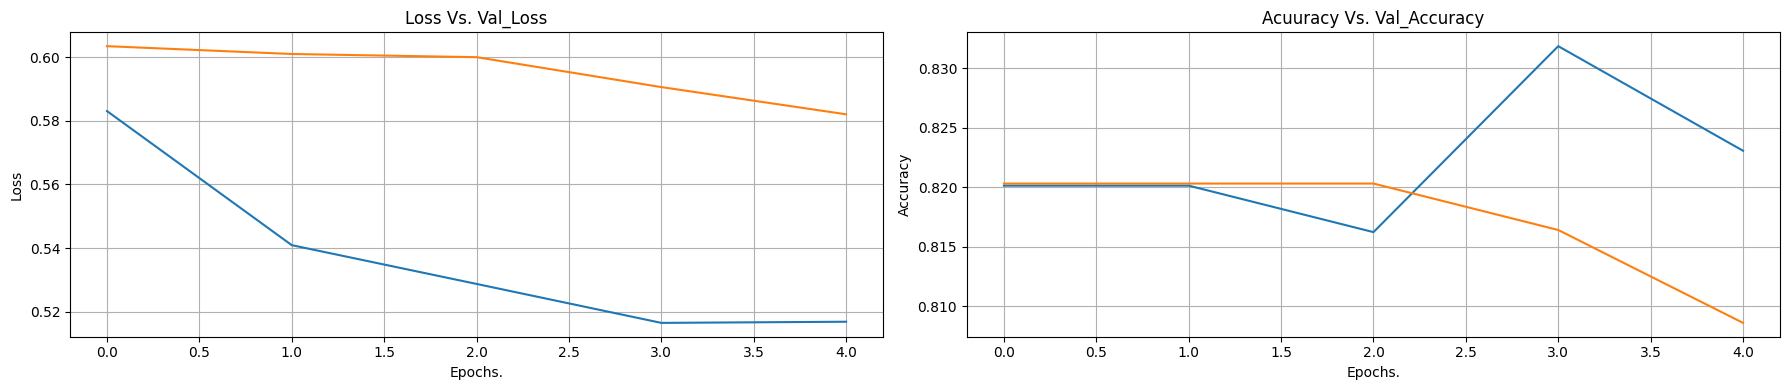

In [71]:
RMSProp = keras.optimizers.RMSprop()
compile_model(RMSProp)

Optimizer used: Adam
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8392 - loss: 0.5122 - val_accuracy: 0.8086 - val_loss: 0.5793
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8138 - loss: 0.5080 - val_accuracy: 0.8125 - val_loss: 0.5796
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8239 - loss: 0.5102 - val_accuracy: 0.8203 - val_loss: 0.5776
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8296 - loss: 0.5135 - val_accuracy: 0.8047 - val_loss: 0.5744
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.5223 - val_accuracy: 0.8203 - val_loss: 0.5765
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.846875
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       270
           1       0.56      0.12      0.20        40
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.0

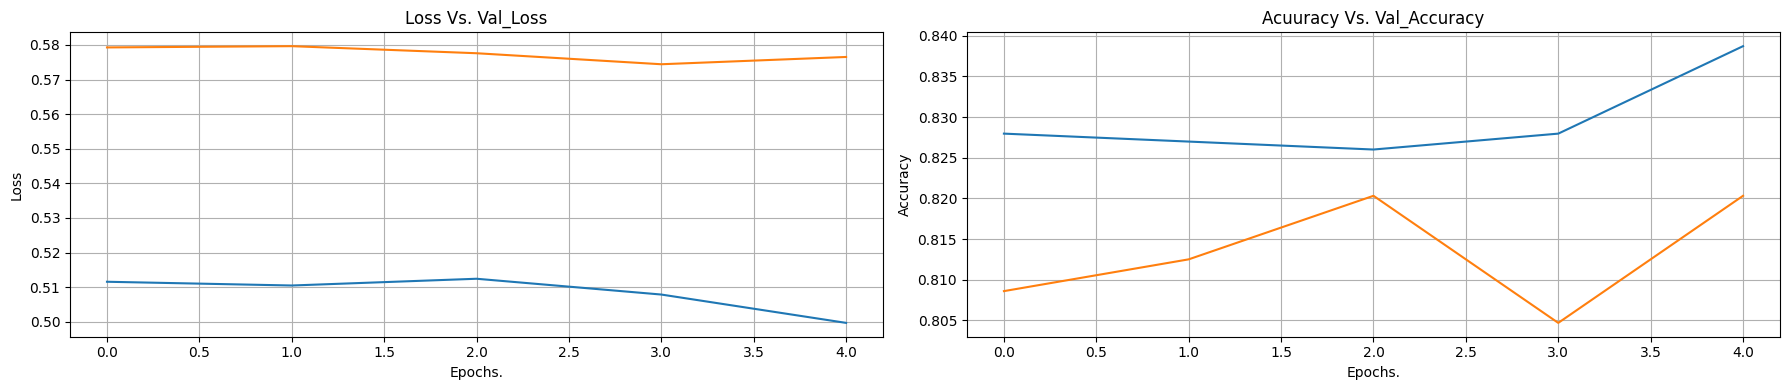

In [72]:
Adam = keras.optimizers.Adam()
compile_model(Adam)